# Amason sales Explanatory  data analysis #

## Simple checkout and basic data preparation ##

First things first, we read file and print out 5 rows to understand what it looks like. Than we can look trough data description and some info.\
Second important step is to check wether we have missing values in this table and fix it if we have those.\
Third step requires us to seek for dublicates and drop them. At this point we can also drop some unnessesary columns. \
Now we can comence with visualisation part.

In [20]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Here we can see that there are 2 nulls in column rating_count and we need to fill gaps.

In [6]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


From this we find out that some of rows aren't unique, therefore we shall drop some

In [8]:
df.dropna(inplace = True)

In [12]:
columns_to_drop = ['product_id',  'user_id',  'review_id','review_title', 'review_content', 'img_link', 'product_link']
df.drop(columns=columns_to_drop,axis=1,inplace=True)

In [13]:
df.duplicated().sum()

79

In [16]:
df = df.drop_duplicates().reset_index(drop=True)

## Visualisations ##

In this part of work we'll conduct some EDA. To present data there are some questions to answer 
1. Which product categories generate the highest revenue?
2. What is total revenue for each category?
3. What are top 5 products?
4. What are top 10 customers by revenue and by the number of purchases?

main_category
Electronics              505
Home&Kitchen             448
Computers&Accessories    393
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_8900\1566735062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = df['main_category'], order = df['main_category'].value_counts().index, palette = "pastel")


Text(0.5, 1.0, 'Product Counts by Main Category')

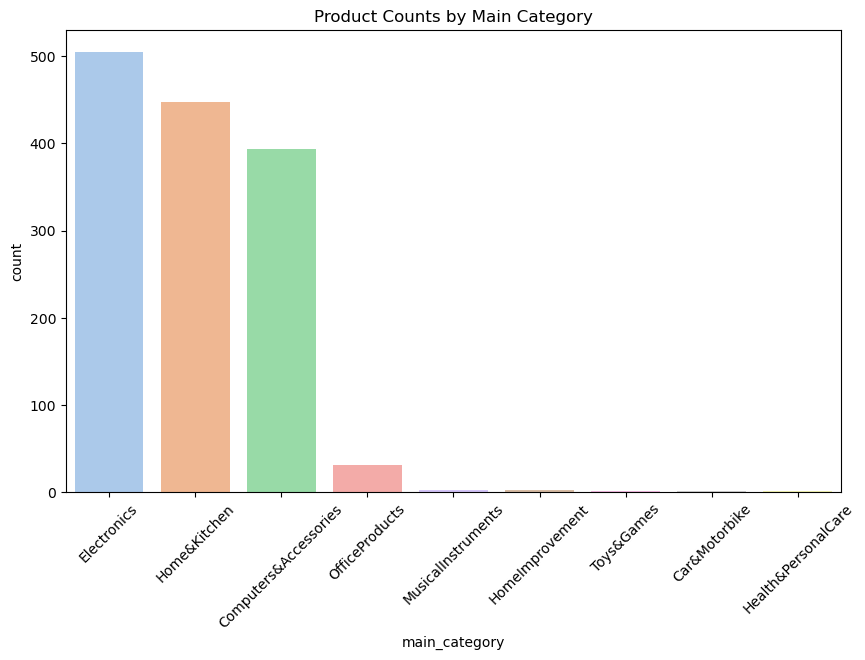

In [31]:
df['main_category'] = df['category'].apply(lambda x: x.split('|')[0])
print(df['main_category'].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(data = df, x = df['main_category'], order = df['main_category'].value_counts().index, palette = "pastel")
plt.xticks(rotation=45)
plt.title('Product Counts by Main Category')


                       discounted_price
main_category                          
Car&Motorbike                   2339.00
Computers&Accessories         359273.99
Electronics                  3037629.00
Health&PersonalCare              899.00
Home&Kitchen                 1044115.81
HomeImprovement                  674.00
MusicalInstruments              1276.00
OfficeProducts                  9349.00
Toys&Games                       150.00


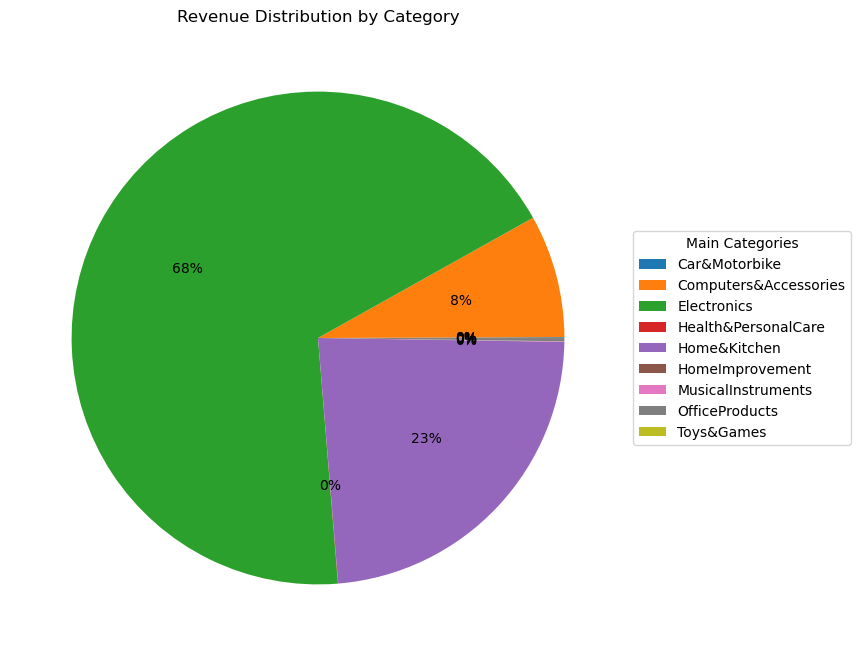

In [51]:
df[['discounted_price','actual_price']] = df[['discounted_price','actual_price']].replace('[₹,]', '', regex=True).astype(float)

pie = df[['main_category','discounted_price']]
pie = pie.groupby('main_category').sum()
print(pie)

plt.figure(figsize=(8, 8))  
wedges, texts, autotexts = plt.pie(pie['discounted_price'], autopct='%1.f%%')

plt.legend(wedges, pie.index, title="Main Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Revenue Distribution by Category')
plt.show()

In [53]:
product_revenue = df[['discounted_price','product_name']]
product_revenue = product_revenue.groupby('product_name').sum()
product_revenue = product_revenue.sort_values('discounted_price', ascending=False)
print('TOP 5 PRODUCTS THAT HAVE BROUGHT MORE REVENUE')
product_revenue.head(5)

TOP 5 PRODUCTS THAT HAVE BROUGHT MORE REVENUE


,discounted_price
product_name,
Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black),77990.0
OnePlus 163.8 cm (65 inches) U Series 4K LED Smart Android TV 65U1S (Black),61999.0
VU 164 cm (65 inches) The GloLED Series 4K Smart LED Google TV 65GloLED (Grey),54990.0
Samsung 138 cm (55 inches) Crystal 4K Neo Series Ultra HD Smart LED TV UA55AUE65AKXXL (Black),47990.0
LG 139 cm (55 inches) 4K Ultra HD Smart LED TV 55UQ7500PSF (Ceramic Black),47990.0


In [52]:
customer_revenue = df[['discounted_price','user_name']]
customer_revenue =customer_revenue.groupby('user_name').sum()
customer_revenue = customer_revenue.sort_values('discounted_price', ascending=False)
print('TOP 10 CUSTOMERS THAT HAVE BROUGHT MORE REVENUE')
customer_revenue.head(10)

TOP 10 CUSTOMERS THAT HAVE BROUGHT MORE REVENUE


,discounted_price
user_name,
"Binu,Sabjan,Ramkapil,User,Amazon Customer,ganesh,basavaraj huggi,Mangesh Borkar",157969.0
"Ayush,ROHIT A.,Kedar,Haran,Santosh Ghante,KRISHNENDU,Harindra,sangamesh",115495.0
"Rashmi,Raghvendra,Hari Prasad P,Vishnu singh,Tarun Kumar Sharma,Dharmendra,K j suresh,Mahore.lakhan",104998.0
"Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,Jean-Louis M.,Mahesh,syed azhar abbas,prabakaran,Sidhu",99995.0
"UtdBuzz,Mukund Nagvenkar,S.R K.,Pruthvi Raj Goud",92989.0
"ASR,Amazon user,Rama Rao,Vinay,ANIKET,NAGA SHANKAR.K,pawan k.,Ravi",91997.0
"siddharth patnaik,Dr Sunilkumar H,Krishna,K. S. Rao,vinayp,indhu,Jogi,DRISHTI VASHISTH GUPTA",89994.0
"prateeq,Suraj Chand,viswanath Raju,Ramamoorthy,Nitesh singh,Adnan,Kailash,Chandani Dinodia",87996.0
"Raj Mohammed,Samson,Haroon sayeed,P Imran Khan,Manohar P,SRF Prashant,Akash Sharma,Sumesh",78980.0
